# Example for the teleconnections

In [1]:
import yaml
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

diagname  = 'teleconnections'
machine   = 'wilma'
telecname = 'NAO'

# Opening yml files

with open(f'../../config/config_{machine}.yml', 'r', encoding='utf-8') as file:
    config = yaml.load(file, Loader=yaml.FullLoader)

with open(f'{diagname}.yml', 'r', encoding='utf-8') as file:
    namelist = yaml.load(file, Loader=yaml.FullLoader)

# Opening dataset file

infile = config[diagname]['input']

field = xr.open_mfdataset(infile)['msl']

## Check and adapt coordinates

In [12]:
def lon_check (lon):
    """ 
    Convert longitude to [0,360] range.

    Parameters
    ----------
    lon : float

    Returns
    -------
    float
    """
    if (lon<0):
        print('ok')
        lon = (lon+180) % 360 
        print(lon)
    return lon

In [15]:
# Azores
lon1 = namelist[telecname]['lon1']
lat1 = namelist[telecname]['lat1']

# Reykiavik
lon2 = namelist[telecname]['lon2']
lat2 = namelist[telecname]['lat2']

print('Azores',lat1,lon1)
print('Ryekjavik',lat2,lon2)

Azores 36 174.5
Ryekjavik 64 158


## NAO evaluation, no temporal rolling average

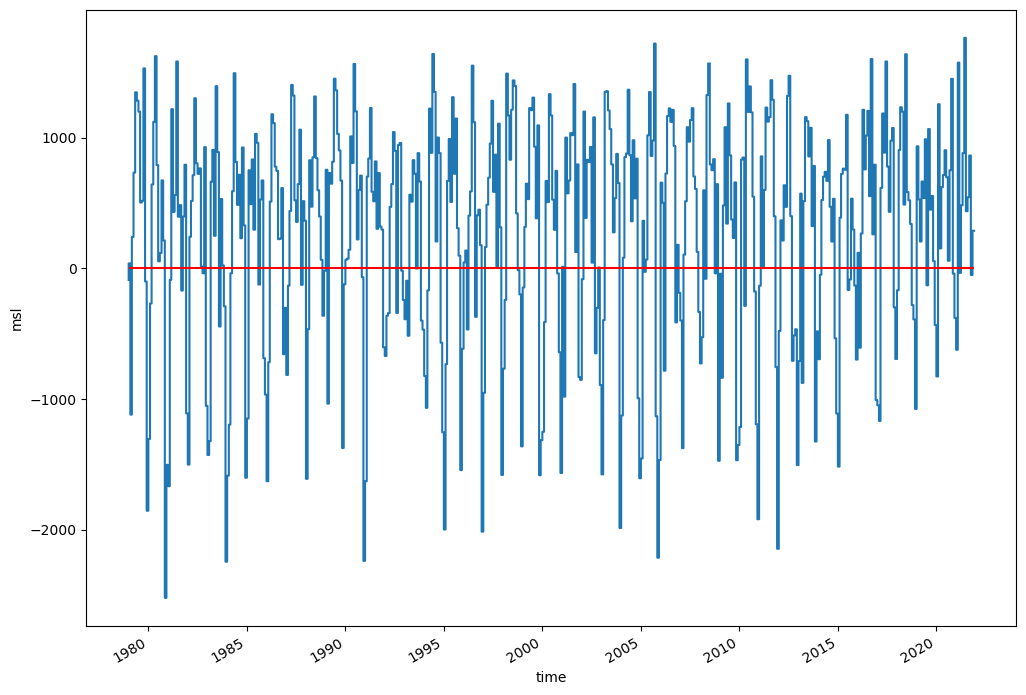

In [24]:
#prs1 = field.sel(lon=namelist[telecname]['lon1'],lat=namelist['NAO']['lat1'],method="nearest")
#prs2 = field.sel(lon=namelist[telecname]['lon2'],lat=namelist['NAO']['lat2'],method="nearest")

# Evaluating NAO

msl1 = field.sel(lon=lon1,lat=lat1,method='nearest')
msl2 = field.sel(lon=lon2,lat=lat2,method='nearest')

NAO = msl1-msl2

########
# Plot #
########

fig, ax = plt.subplots(figsize=(12, 8))

NAO.plot(ax=ax,ds='steps')
ax.hlines(y=0,xmin=min(NAO['time']),xmax=max(NAO['time']),color='red')

## Seasonal (3-months) average

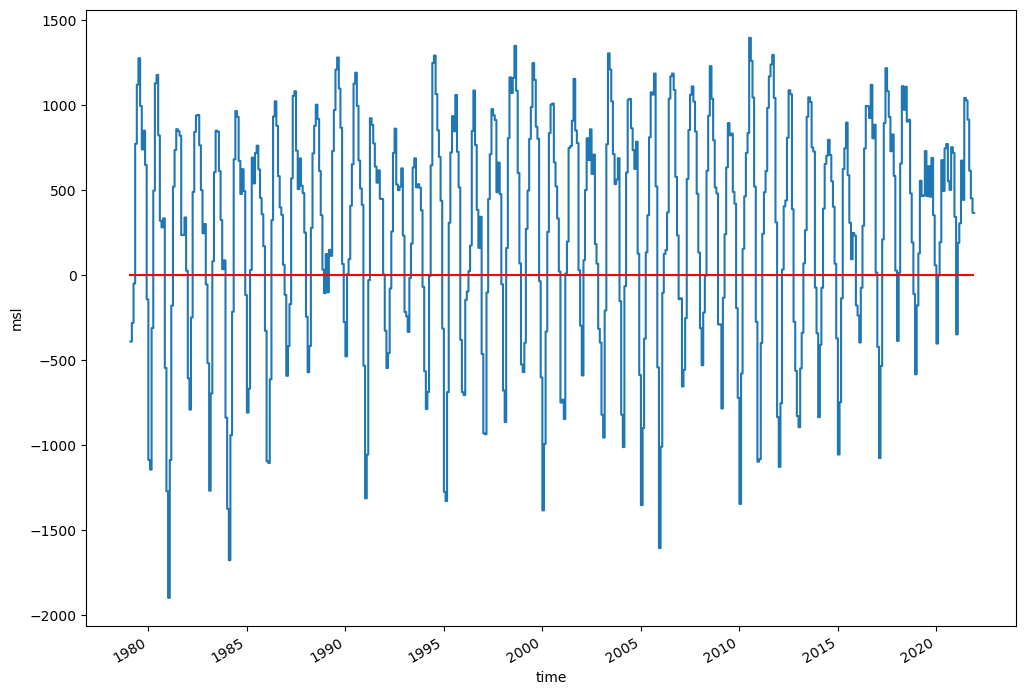

In [25]:
msl1_ma = msl1.rolling(time=3).mean()
msl2_ma = msl2.rolling(time=3).mean()

NAO_ma = msl1_ma-msl2_ma

########
# Plot #
########

fig, ax = plt.subplots(figsize=(12, 8))

NAO_ma.plot(ax=ax,ds='steps')
ax.hlines(y=0,xmin=min(NAO_ma['time']),xmax=max(NAO_ma['time']),color='red')

## Index evaluation (3 months average)

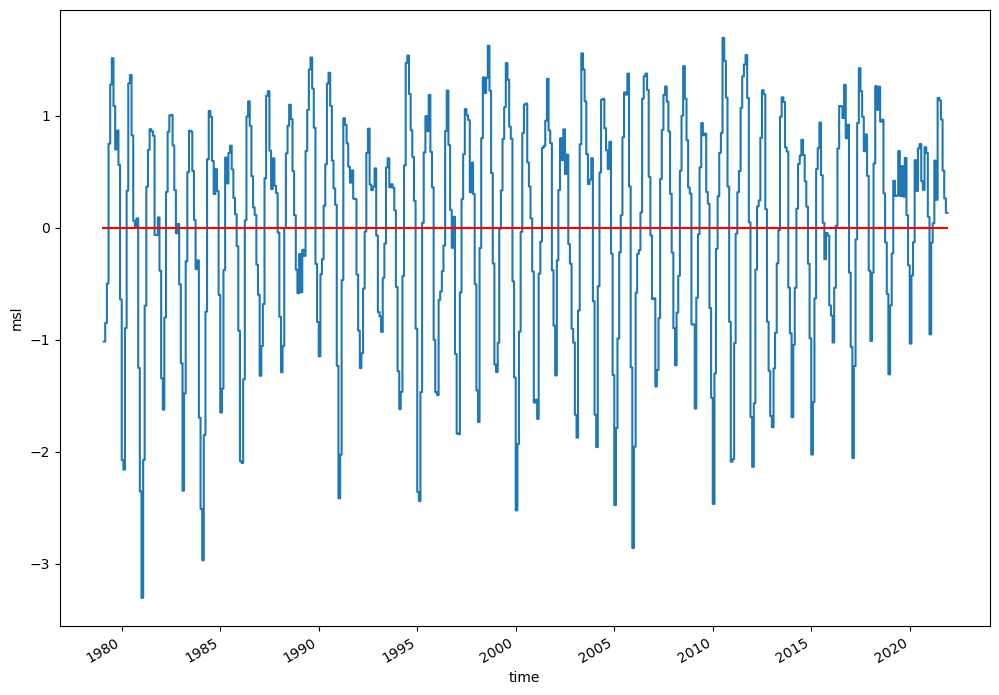

In [28]:
mean_ma = NAO_ma.mean()
std_ma  = NAO_ma.std()

NAO_ma_std = (NAO_ma-mean_ma)/std_ma

########
# Plot #
########

fig, ax = plt.subplots(figsize=(12, 8))

NAO_ma_std.plot(ax=ax,ds='steps')
ax.hlines(y=0,xmin=min(NAO_ma_std['time']),xmax=max(NAO_ma_std['time']),color='red')


## Different time selection

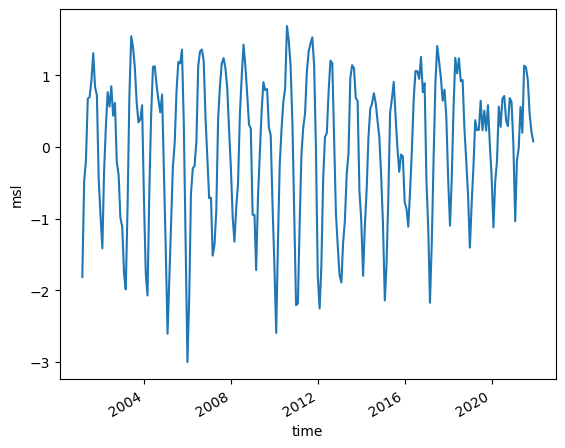

In [29]:
msl1_tsel = msl1.sel(time=msl1.time.dt.year>2000)
msl2_tsel = msl2.sel(time=msl2.time.dt.year>2000)

msl1_tsel = msl1_tsel.rolling(time=3).mean()
msl2_tsel = msl2_tsel.rolling(time=3).mean()

NAO_tsel = msl1_tsel-msl2_tsel

NAO_tsel_mean = NAO_tsel.mean()
NAO_tsel_std  = NAO_tsel.std()

indx_tsel = (NAO_tsel-NAO_tsel_mean)/NAO_tsel_std
indx_tsel.plot()

## Save output to .nc database

In [30]:
outfile = config[diagname]['output']
filename = '/NAO_indx.nc'
outfile = outfile+filename

NAO_ma.to_netcdf(outfile)